In [ ]:
! pip install git+https://github.com/variantperception/vp-analysis-api.git

In [1]:
import os
from vp_analysis_api.VPAnalysisAPI import VPAnalysisAPI

# download api key file from https://portal.variantperception.com/user/settings?tab=api%20keys
# save the value in your local user directory (C:/Users/John/vp_api_key.txt)
# or set the key as an environment variable: VP_ANALYSIS_API_KEY 
if "VP_ANALYSIS_API_KEY" in os.environ:
    print("Reading API key from environment")
    api_key = os.environ.get("VP_ANALYSIS_API_KEY")
else:
    with open(os.path.expanduser('~/vp_api_key.txt'), 'r') as file:
        print("Reading API key from file")
        api_key = file.read().replace('\n', '')
print(f"API Key: {api_key[:5]}...")
api = VPAnalysisAPI(api_key)


Reading API key from environment
API Key: eyJhb...


In [2]:
# Get tactical Fast Money data for S&P 500 and ACWI
data = api.get_series(["spx_fast_money", "acwi_fast_money"], start_date='2010-01-01', end_date='2012-01-01')

# optional step to enforce frequency and forward-fill holes in data
data = api.clean_df(data, freq='D', start_date=None)
data

,acwi_fast_money,spx_fast_money
dt,,
2010-01-01,0.032605,0.033488
2010-01-02,0.032605,0.033488
2010-01-03,0.032612,0.033488
2010-01-04,0.035607,0.037364
2010-01-05,0.036233,0.037478
...,...,...
2011-12-28,-0.005676,0.004054
2011-12-29,-0.004461,0.005941
2011-12-30,-0.004398,0.006294


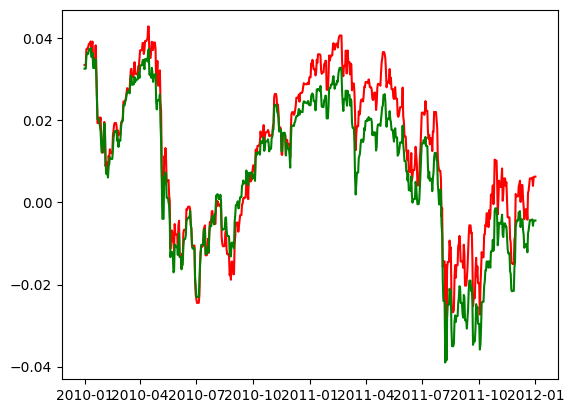

In [3]:
# Plot data
import matplotlib.pyplot as plt
plt.plot(data['spx_fast_money'], color='red')
plt.plot(data['acwi_fast_money'], color='green')

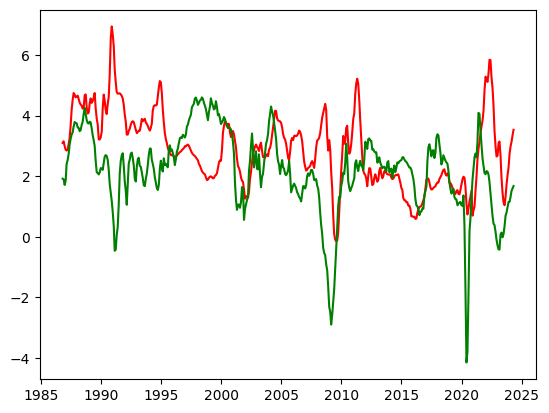

In [12]:
# Get US leading indicators
data = api.get_series(["lei_us_grow", "lei_us_infl"])
data = api.clean_df(data, freq='M', start_date=None)
import matplotlib.pyplot as plt
plt.plot(data['lei_us_infl'], color='red')
plt.plot(data['lei_us_grow'], color='green')


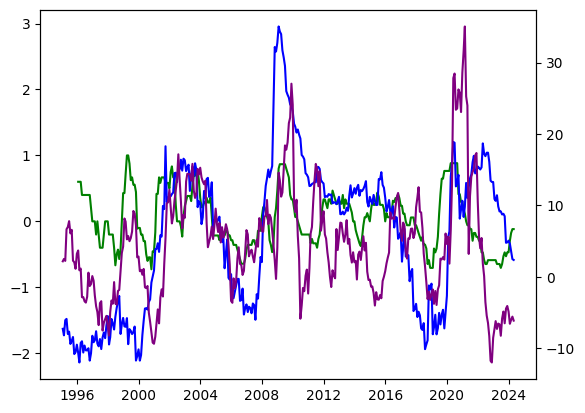

In [9]:
# Get cyclical models: BCFI, Global Excess Liquidity, and Mehrling Multiplier
data = api.get_series(["bcfi24", "globexliq24", "mehrlingmult"])
data = api.clean_df(data, freq='M', start_date='1995-01-01')
import matplotlib.pyplot as plt
plt.plot(data['bcfi24'], color='green')
plt.plot(data['mehrlingmult'], color='blue')
plt.twinx().plot(data['globexliq24'], color='purple')
